170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/25
782/782 [==============================] - 442s 562ms/step - loss: 1.4651 - accuracy: 0.4788 - val_loss: 1.1211 - val_accuracy: 0.5983
Epoch 2/25
782/782 [==============================] - 432s 553ms/step - loss: 1.0572 - accuracy: 0.6321 - val_loss: 0.9243 - val_accuracy: 0.6844
Epoch 3/25
782/782 [==============================] - 427s 546ms/step - loss: 0.9181 - accuracy: 0.6798 - val_loss: 0.8319 - val_accuracy: 0.7082
Epoch 4/25
782/782 [==============================] - 427s 546ms/step - loss: 0.8268 - accuracy: 0.7120 - val_loss: 0.7696 - val_accuracy: 0.7349
Epoch 5/25
782/782 [==============================] - 430s 550ms/step - loss: 0.7507 - accuracy: 0.7362 - val_loss: 0.8346 - val_accuracy: 0.7159
Epoch 6/25
782/782 [==============================] - 429s 549ms/step - loss: 0.6990 - accuracy: 0.7536 - val_loss: 0.7554 - val_accuracy: 0.7438
Epoch 7/25
782/782 [==============================] - 427

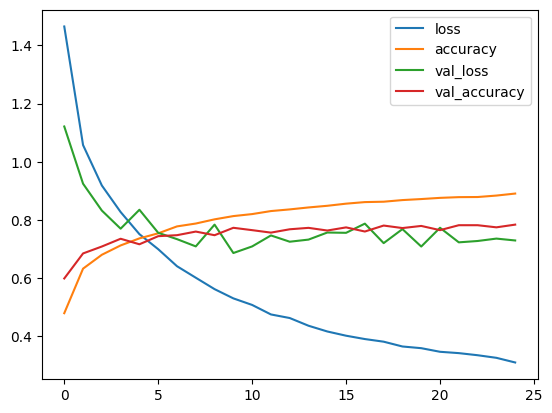

In [1]:
import numpy
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.constraints import MaxNorm
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
# Set random seed for purposes of reproducibility
seed = 21
from keras.datasets import cifar10
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
# Loading in the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Normalise the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# One-hot encode outputs
y_train = to_categorical(y_train, num_classes=10)  # Assuming 10 classes in CIFAR-10
y_test = to_categorical(y_test, num_classes=10)    # Assuming 10 classes in CIFAR-10
class_num = y_test.shape[1]
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(class_num, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'val_accuracy'])
# print(model.summary())
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
numpy.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=64)
# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
pd.DataFrame(history.history).plot()
plt.show()

In [2]:
### Baseline Model with Multi-Layer Perceptrons
# Baseline MLP for MNIST dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
 # create model
 model = Sequential()
 model.add(Dense(num_pixels, input_shape=(num_pixels,), kernel_initializer='normal', activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
 # Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
300/300 - 7s - loss: 0.2809 - accuracy: 0.9198 - val_loss: 0.1400 - val_accuracy: 0.9590 - 7s/epoch - 22ms/step
Epoch 2/10
300/300 - 7s - loss: 0.1104 - accuracy: 0.9682 - val_loss: 0.0962 - val_accuracy: 0.9701 - 7s/epoch - 22ms/step
Epoch 3/10
300/300 - 6s - loss: 0.0716 - accuracy: 0.9791 - val_loss: 0.0782 - val_accuracy: 0.9751 - 6s/epoch - 19ms/step
Epoch 4/10
300/300 - 7s - loss: 0.0500 - accuracy: 0.9857 - val_loss: 0.0699 - val_accuracy: 0.9777 - 7s/epoch - 22ms/step
Epoch 5/10
300/300 - 5s - loss: 0.0365 - accuracy: 0.9898 - val_loss: 0.0630 - val_accuracy: 0.9802 - 5s/epoch - 18ms/step
Epoch 6/10
300/300 - 7s - loss: 0.0259 - accuracy: 0.9928 - val_loss: 0.0629 - val_accuracy: 0.9808 - 7s/epoch - 22ms/step
Epoch 7/10
300/300 - 6s - loss: 0.0199 - accuracy: 0.9946 - val_loss: 0.0649 - val_accuracy: 0.9799 - 6s/epoch - 19ms/step
Epoch 8/10
300/300 - 7s - loss: 0.0147 - accuracy: 0.9969 - val_loss: 0.05

In [3]:
### Simple Convolutional Neural Network for MNIST
# Simple CNN for the MNIST Dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
# define a simple CNN model
def baseline_model():
 # create model
 model = Sequential()
 model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
 model.add(MaxPooling2D())
 model.add(Dropout(0.2))
 model.add(Flatten())
 model.add(Dense(128, activation='relu'))
 model.add(Dense(num_classes, activation='softmax'))
 # Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 36s 117ms/step - loss: 0.2599 - accuracy: 0.9254 - val_loss: 0.0802 - val_accuracy: 0.9760
Epoch 2/10
300/300 [==============================] - 36s 121ms/step - loss: 0.0756 - accuracy: 0.9774 - val_loss: 0.0556 - val_accuracy: 0.9821
Epoch 3/10
300/300 [==============================] - 36s 119ms/step - loss: 0.0527 - accuracy: 0.9842 - val_loss: 0.0408 - val_accuracy: 0.9871
Epoch 4/10
300/300 [==============================] - 36s 120ms/step - loss: 0.0422 - accuracy: 0.9862 - val_loss: 0.0401 - val_accuracy: 0.9870
Epoch 5/10
300/300 [==============================] - 35s 115ms/step - loss: 0.0342 - accuracy: 0.9895 - val_loss: 0.0354 - val_accuracy: 0.9887
Epoch 6/10
300/300 [==============================] - 35s 118ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.0393 - val_accuracy: 0.9881
Epoch 7/10
300/300 [==============================] - 35s 117ms/step - loss: 0.0232 - accuracy: 0.9924 - val_loss: 0.0342 - val_ac

In [4]:
### Larger Convolutional Neural Network for MNIST
# Larger CNN for the MNIST Dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
# define the larger model
def larger_model():
 # create model
 model = Sequential()
 model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
 model.add(MaxPooling2D())
 model.add(Conv2D(15, (3, 3), activation='relu'))
 model.add(MaxPooling2D())
 model.add(Dropout(0.2))
 model.add(Flatten())
 model.add(Dense(128, activation='relu'))
 model.add(Dense(50, activation='relu'))
 model.add(Dense(num_classes, activation='softmax'))
 # Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 43s 140ms/step - loss: 0.3641 - accuracy: 0.8910 - val_loss: 0.0844 - val_accuracy: 0.9713
Epoch 2/10
300/300 [==============================] - 40s 134ms/step - loss: 0.0989 - accuracy: 0.9701 - val_loss: 0.0548 - val_accuracy: 0.9828
Epoch 3/10
300/300 [==============================] - 41s 136ms/step - loss: 0.0696 - accuracy: 0.9788 - val_loss: 0.0404 - val_accuracy: 0.9869
Epoch 4/10
300/300 [==============================] - 40s 135ms/step - loss: 0.0587 - accuracy: 0.9817 - val_loss: 0.0355 - val_accuracy: 0.9885
Epoch 5/10
300/300 [==============================] - 40s 134ms/step - loss: 0.0506 - accuracy: 0.9838 - val_loss: 0.0323 - val_accuracy: 0.9894
Epoch 6/10
300/300 [==============================] - 43s 144ms/step - loss: 0.0453 - accuracy: 0.9861 - val_loss: 0.0345 - val_accuracy: 0.9882
Epoch 7/10
300/300 [==============================] - 39s 130ms/step - loss: 0.0398 - accuracy: 0.9869 - val_loss: 0.0314 - val_ac